# Métodos iterativos

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

import time
import numpy as np
import scipy.io as scp
import matplotlib.pyplot as plt

## Programando

![](../resources/images/lab5/programming-section.png)

**Punto 1.1:** Calculamos el gradiente.

$$
\begin{gather}
\nabla f = 
\begin{bmatrix}
200(x_2 - x_1^2)(-2 x_1) - 2(1 - x_1) \\
200(x_2 - x_1^2)
\end{bmatrix} \\
\nabla f = 2
\begin{bmatrix}
-200(x_1 x_2 - x_1^3) - 1 + x_1 \\
100(x_2 - x_1^2)
\end{bmatrix} \\
\boxed{
\nabla f = 2
\begin{bmatrix}
200 x_1^3 - 200 x_1 x_2 + x_1 - 1 \\
100(x_2 - x_1^2)
\end{bmatrix}}
\end{gather}
$$

**Punto 1.2:** Implementamos el método de gradiente descendiente para la función $f(x)$.

In [2]:
def gradient(point):
    df_x1 = 200.0 * np.power(point[0], 3) - 200.0 * np.multiply(point[0], point[1]) + point[0] - 1.0
    df_x2 = 100.0 * (point[1] - point[0]**2)
    return np.multiply(2.0, np.array([df_x1, df_x2]))

def steepest_descent(iterations, step_size, initial_point):
    min_diff = 0.00001
    max_diff = 1 * 10 ** 80
    values = []
    gradients = []
    times = []
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - np.dot(step_size, gradient(xk)))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff = np.linalg.norm(values[i] - values[i - 1])
            if diff < min_diff or diff > max_diff:
                break
    
    return [np.array(gradients), np.array(times), np.array(values)]

Utilizamos dos puntos para los métodos. En primera instancia, usamos un **paso arbitrario**.

In [3]:
p_a = np.array([1.2, 1.2])
p_b = np.array([-1.2, 1])
p_manual = 0.0001
iterations = 40

Utilizamos los parámetros para el método de **Gradiente descendiente**.

In [4]:
results_step_des = {
    'manual_pa': steepest_descent(iterations, p_manual, p_a), 
    'manual_pb': steepest_descent(iterations, p_manual, p_b),
}

**Punto 1.3:** Implementamos el método de Newton. Empezamos calculando la *Hessiana*.

$$
\begin{gather}
\nabla^2 f = 2
\begin{bmatrix}
600 x_1^2 - 200 x_2 + 1 & -200 x_1 \\
100(-2 x_1) & 100
\end{bmatrix} \\
\boxed{
\nabla^2 f = 200
\begin{bmatrix}
6 x_1^2 - 2 x_2 + \frac{1}{100} & -2 x_1 \\
-2 x_1 & 1
\end{bmatrix}}
\end{gather}
$$

In [5]:
def hessian(point):
    h_11 = np.multiply(6, np.power(point[0], 2)) - np.multiply(2, point[1]) + 1.0/100.0
    h_12 = -2 * point[0]
    h_21 = h_12
    h_22 = 1

    return 200 * np.array([[h_11, h_12], [h_21, h_22]])

def newton(iterations, step_size, initial_point):
    min_diff = 0.00001
    max_diff = 1 * 10 ** 80
    values = []
    gradients = []
    times = []
    
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - np.dot(np.linalg.inv(hessian(xk)), grad_xk))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff = np.linalg.norm(values[i] - values[i - 1])
            if diff < min_diff or diff > max_diff:
                break

    return [np.array(gradients), np.array(times), np.array(values)]

Utilizamos los mismos puntos para el método:

In [6]:
results_newton = {
    'manual_pa': newton(iterations, p_manual, p_a), 
    'manual_pb': newton(iterations, p_manual, p_b),
}

**Punto 1.4:** Calcular los pasos fijos.

In [7]:
def step_descent(point):
    return -1 * np.divide(gradient(point), np.linalg.norm(gradient(point)))

Usamos los puntos para calcular el paso óptimo:

In [8]:
p_descent_pa = step_descent(p_a)
p_descent_pb = step_descent(p_b)

results_step_des['opt_pa'] = steepest_descent(iterations, p_descent_pa, p_a)
results_step_des['opt_pb'] = steepest_descent(iterations, p_descent_pb, p_b)

### Visualización de resultados

Para el método de **Gradiente descendiente** tenemos los siguientes resultados en cada unos de los puntos:

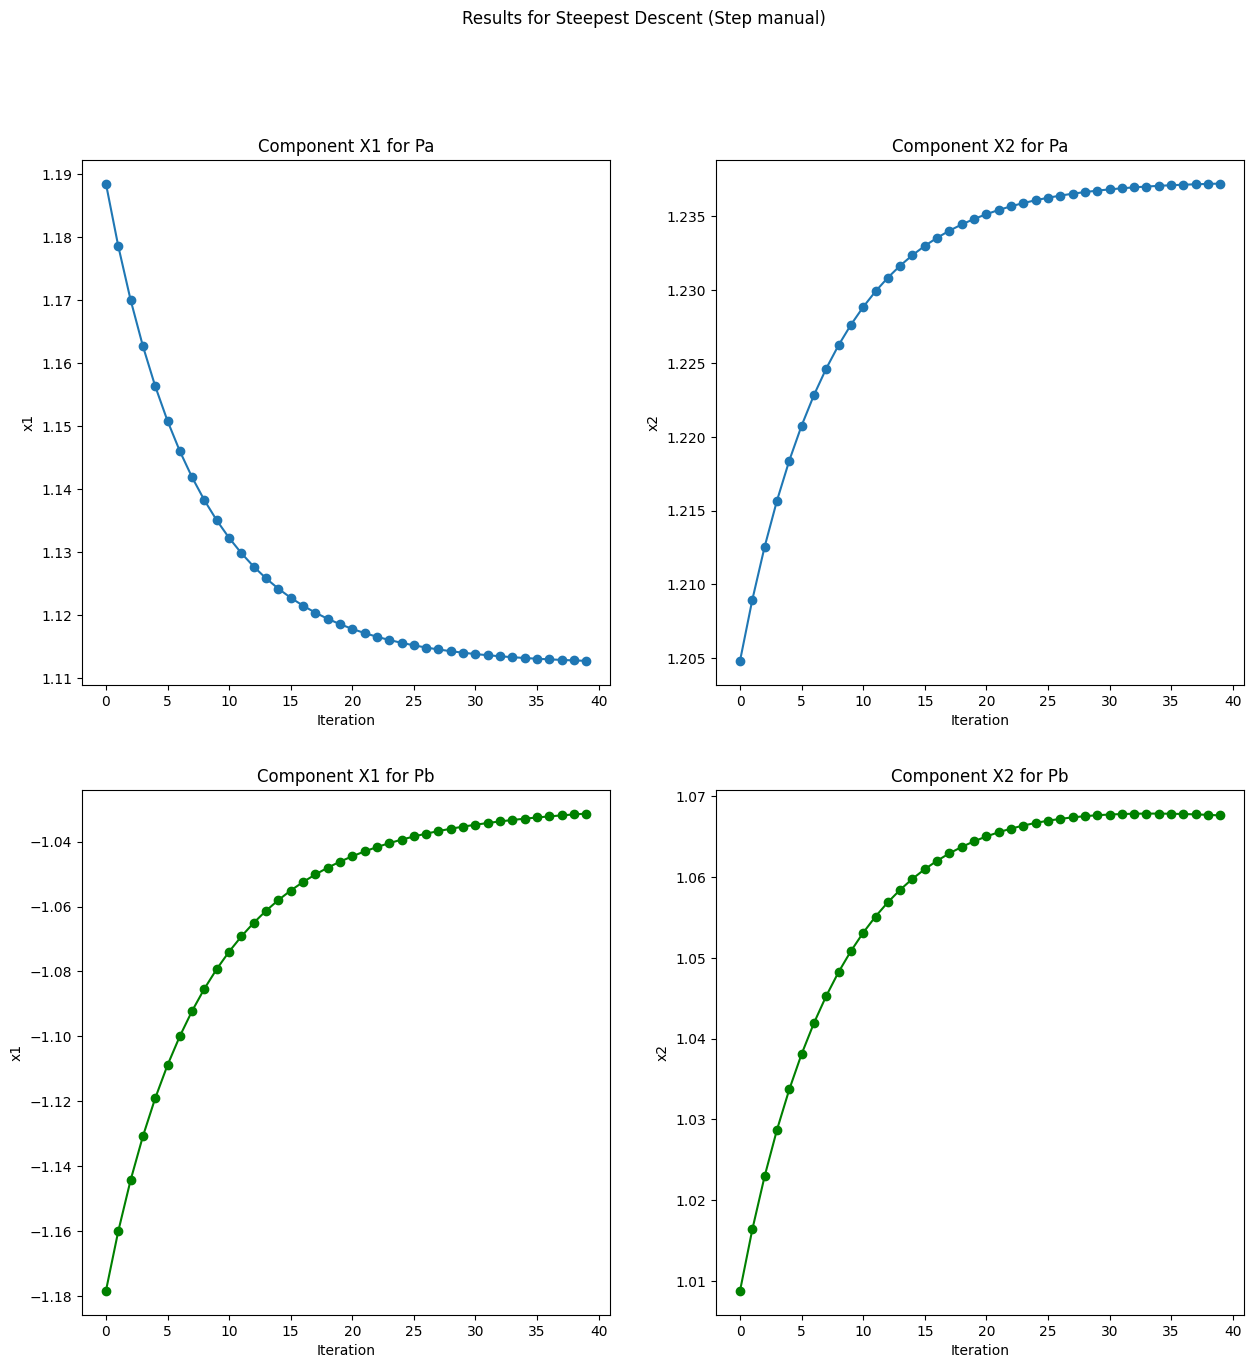

In [9]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 2, 1)
plt.plot(results_step_des['manual_pa'][2][:, 0], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.title('Component X1 for Pa')
plt.subplot(2, 2, 2)
plt.plot(results_step_des['manual_pa'][2][:, 1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.title('Component X2 for Pa')

plt.subplot(2, 2, 3)
plt.plot(results_step_des['manual_pb'][2][:, 0], marker = 'o', color = 'green')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.title('Component X1 for Pb')
plt.subplot(2, 2, 4)
plt.plot(results_step_des['manual_pb'][2][:, 1], marker = 'o', color = 'green')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.title('Component X2 for Pb')

plt.suptitle('Results for Steepest Descent (Step manual)')
plt.show()

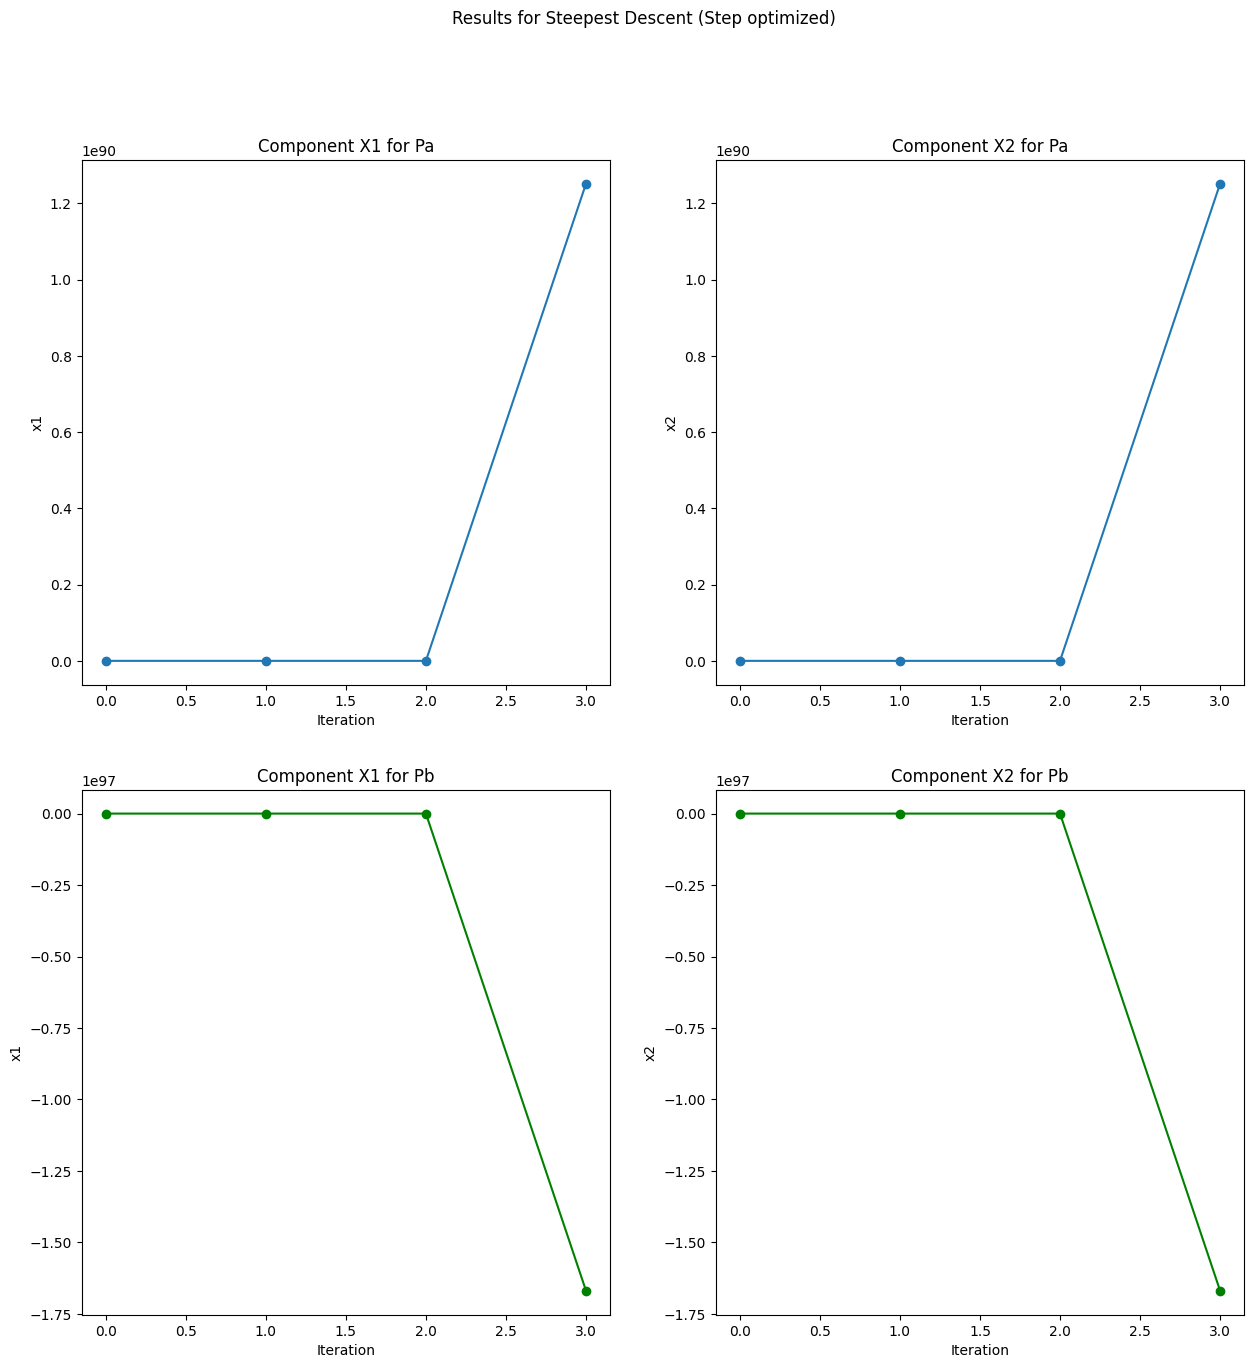

In [10]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 2, 1)
plt.plot(results_step_des['opt_pa'][2][:, 0], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.title('Component X1 for Pa')
plt.subplot(2, 2, 2)
plt.plot(results_step_des['opt_pa'][2][:, 1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.title('Component X2 for Pa')

plt.subplot(2, 2, 3)
plt.plot(results_step_des['opt_pb'][2][:, 0], marker = 'o', color = 'green')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.title('Component X1 for Pb')
plt.subplot(2, 2, 4)
plt.plot(results_step_des['opt_pb'][2][:, 1], marker = 'o', color = 'green')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.title('Component X2 for Pb')

plt.suptitle('Results for Steepest Descent (Step optimized)')
plt.show()

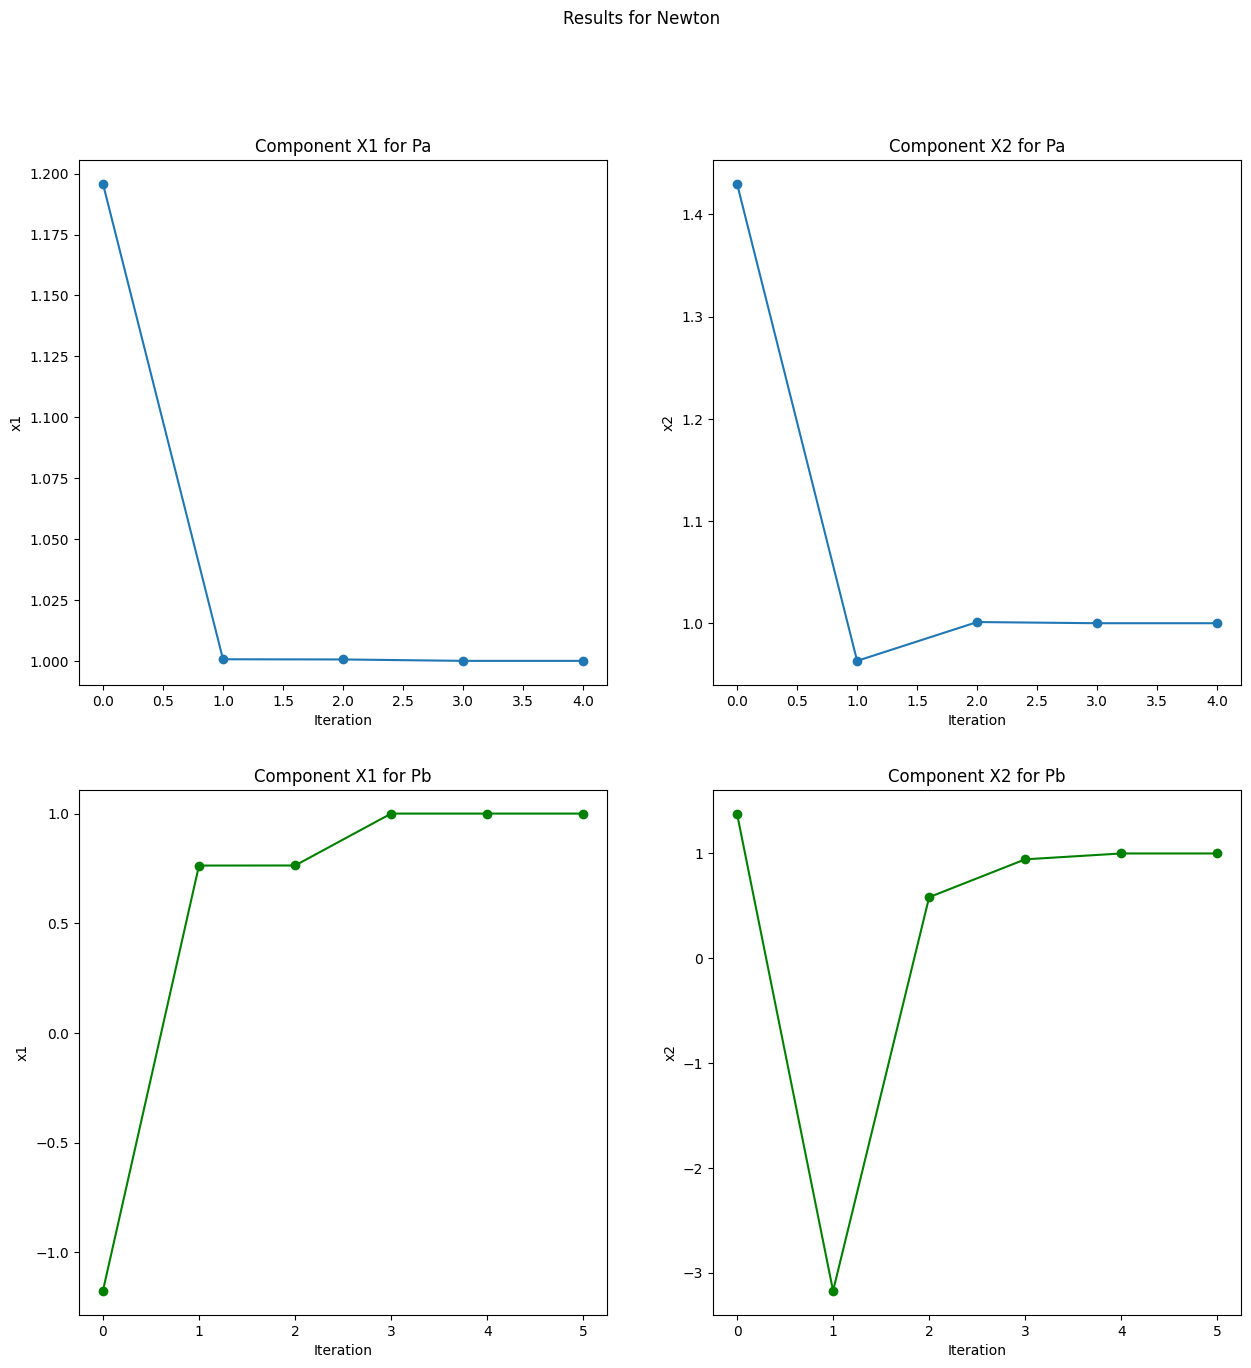

In [11]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 2, 1)
plt.plot(results_newton['manual_pa'][2][:, 0], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.title('Component X1 for Pa')
plt.subplot(2, 2, 2)
plt.plot(results_newton['manual_pa'][2][:, 1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.title('Component X2 for Pa')

plt.subplot(2, 2, 3)
plt.plot(results_newton['manual_pb'][2][:, 0], marker = 'o', color = 'green')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.title('Component X1 for Pb')
plt.subplot(2, 2, 4)
plt.plot(results_newton['manual_pb'][2][:, 1], marker = 'o', color = 'green')
plt.xlabel('Iteration')
plt.ylabel('x2')
plt.title('Component X2 for Pb')

plt.suptitle('Results for Newton')
plt.show()

## Análisis de convergencia y comparación de rendimiento

### A: Gráfico de convergencia

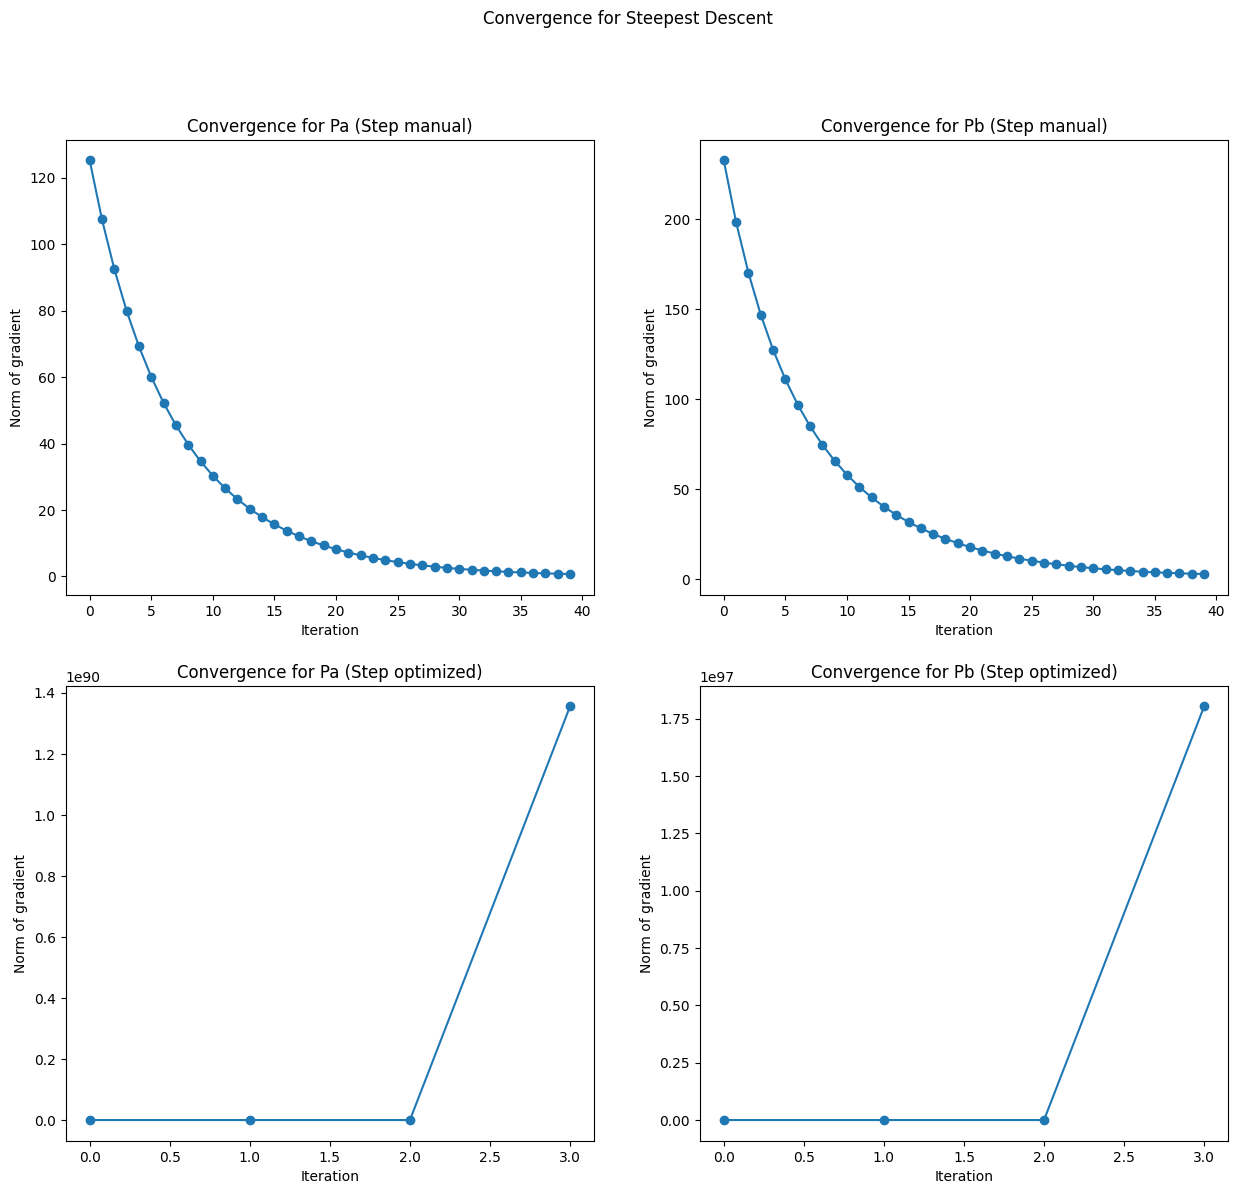

In [12]:
plt.figure(figsize = (15, 13))

plt.subplot(2, 2, 1)
plt.plot(np.linalg.norm(results_step_des['manual_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa (Step manual)')
plt.subplot(2, 2, 2)
plt.plot(np.linalg.norm(results_step_des['manual_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb (Step manual)')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_step_des['opt_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa (Step optimized)')
plt.subplot(2, 2, 4)
plt.plot(np.linalg.norm(results_step_des['opt_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb (Step optimized)')

plt.suptitle('Convergence for Steepest Descent')
plt.show()

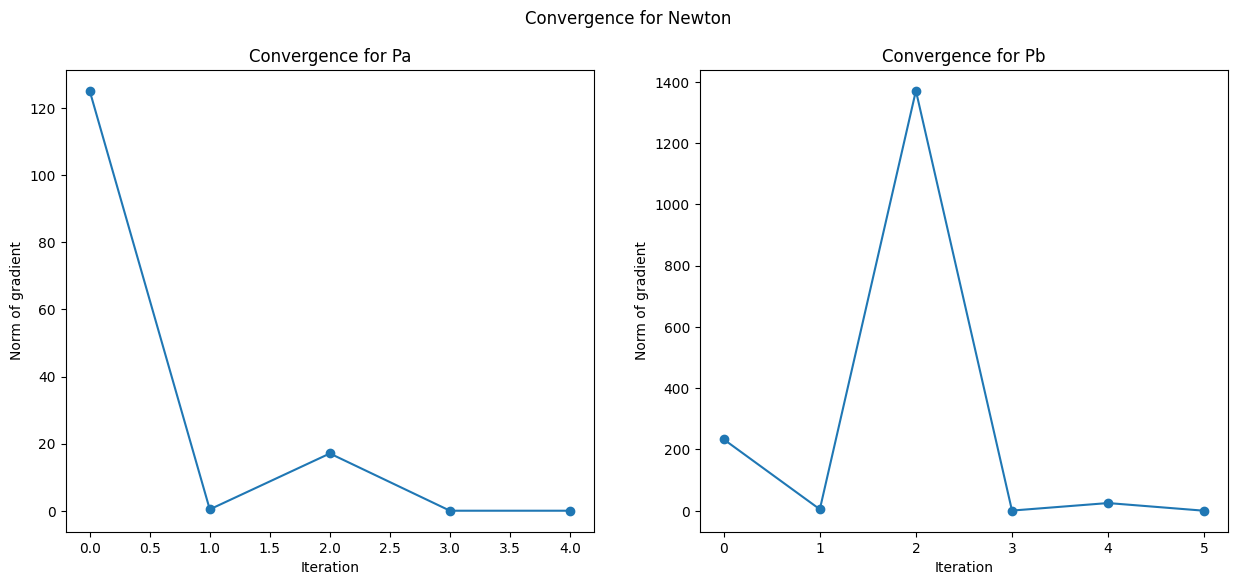

In [13]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.plot(np.linalg.norm(results_newton['manual_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa')
plt.subplot(1, 2, 2)
plt.plot(np.linalg.norm(results_newton['manual_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb')

plt.suptitle('Convergence for Newton')
plt.show()

### B: Comparación de rendimiento

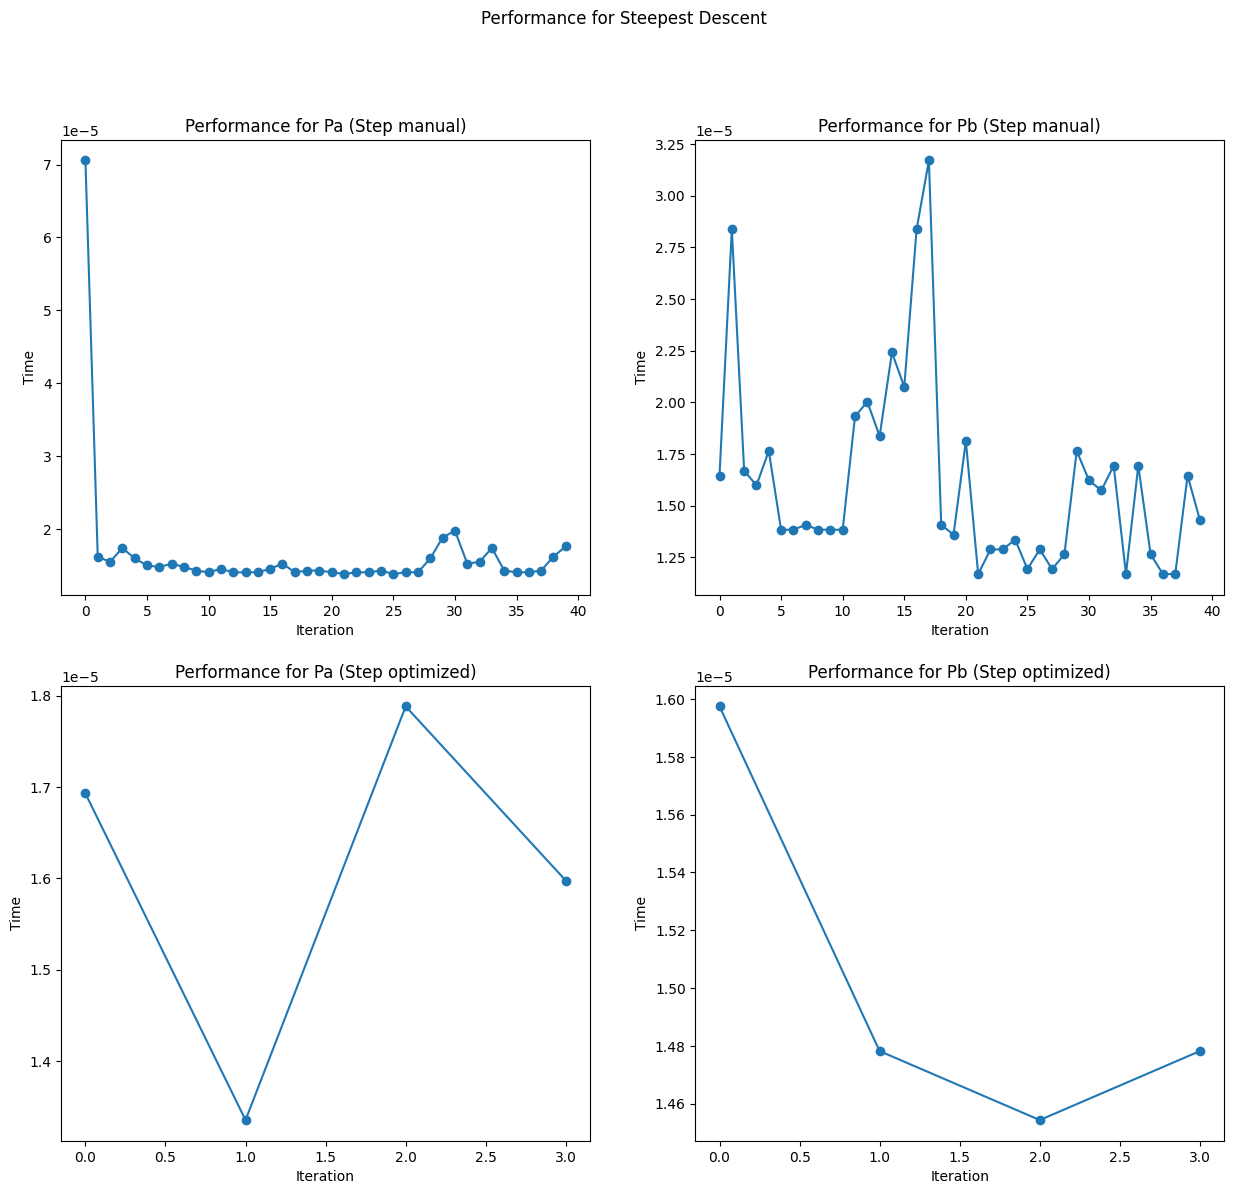

In [14]:
plt.figure(figsize = (15, 13))

plt.subplot(2, 2, 1)
plt.plot(results_step_des['manual_pa'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pa (Step manual)')
plt.subplot(2, 2, 2)
plt.plot(results_step_des['manual_pb'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pb (Step manual)')

plt.subplot(2, 2, 3)
plt.plot(results_step_des['opt_pa'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pa (Step optimized)')
plt.subplot(2, 2, 4)
plt.plot(results_step_des['opt_pb'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pb (Step optimized)')

plt.suptitle('Performance for Steepest Descent')
plt.show()

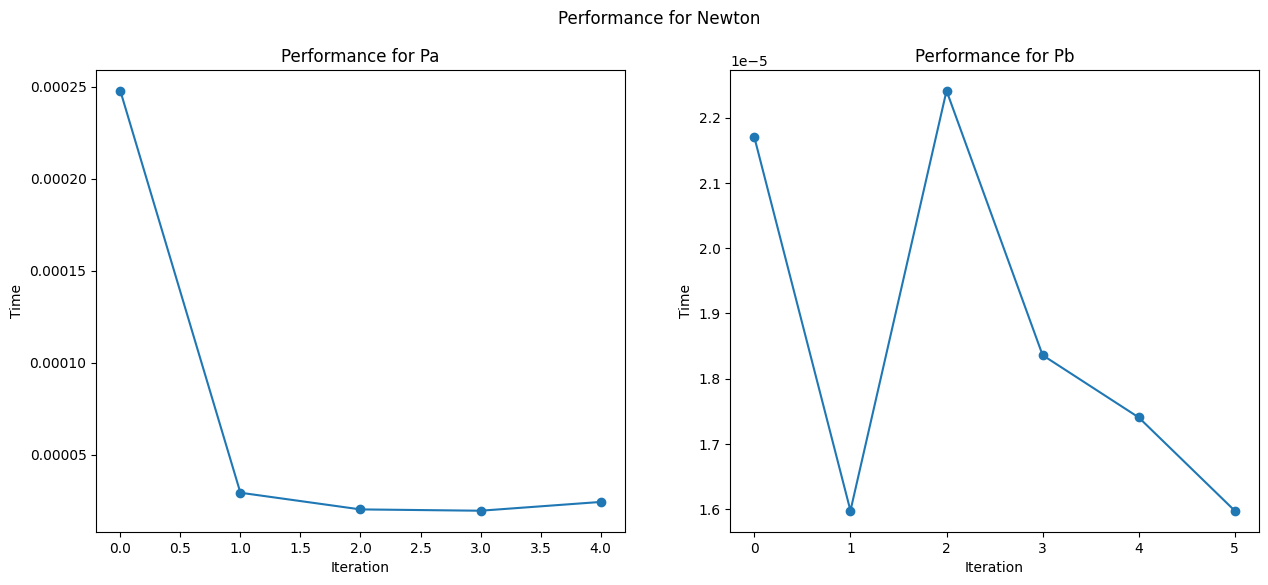

In [15]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.plot(results_newton['manual_pa'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pa')
plt.subplot(1, 2, 2)
plt.plot(results_newton['manual_pb'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pb')


plt.suptitle('Performance for Newton')
plt.show()

## Interpretando la optimización en encriptación de imagen

La imagen $Y \in \mathbb{R}^{128 \times 64}$ se define como el producto entre $H \in \mathbb{R}^{128 \times 64}$ y $X \in \mathbb{R}^{64 \times 64}$.

$$
Y = HX
$$

### 1. Formulamos el problema de optimización

Definimos la función de costo a optimizar, en este caso, queremos que la diferencia entre la imagen encriptada $Y$ y la multiplicación de la transformación $H$ por la imagen original $X$ sea la mínima. Como la diferencia mínima será 0, entonces la matriz que representa las diferencias valor a valor será la matriz cero $0 \in \mathbb{R}^{128 \times 64}$, que representa nuestro **valor óptimo**.

$$
f(X) = Y - HX
$$

Si $f(X') = 0$ entonces decimos que $X'$ será el **óptimo**. El óptimo en nuestro caso será la imagen original, que es desconocida. Una transformación que podemos hacer a $f(X)$ para que nos produza un valor en $\mathbb{R}$ es usar la norma $\ell_2$, entonces:

$$
\begin{gather}
\begin{Vmatrix}
f(X)
\end{Vmatrix}^2_2 =
\begin{Vmatrix}
Y - HX
\end{Vmatrix}^2_2 
\end{gather}
$$

Finalmente, formulamos el problema de optimización:
$$
\begin{matrix}
minimize & \begin{Vmatrix}
Y - HX
\end{Vmatrix}^2_2 \\
X \in \mathbb{R}^{64 \times 64}
\end{matrix}
$$


### 2. Calculamos el gradiente del problema propuesto

Simplificamos la norma $\ell_2$ y operamos el gradiente después:

$$
\begin{gather}
g(x) = \begin{Vmatrix}
f(X)
\end{Vmatrix}^2_2 \\
g(x) =
\begin{Vmatrix}
Y - HX
\end{Vmatrix}^2_2 \\
\boxed{\nabla g(x) = -2 H^T (Y - H X)}
\end{gather}
$$

Cargamos las matrices dadas como constantes.

In [16]:
data = scp.loadmat("../resources/images/lab5/encripada.mat")
print(data.keys())
Y_image = data["y"]
H_image = data["H"]

dict_keys(['__header__', '__version__', '__globals__', 'H', 'y'])


Implementamos el método de **gradiente descendiente** para esta función.

In [17]:
H_transpose = np.transpose(H_image)
def gradient_image(X_image):
    grad = np.dot(H_transpose, (Y_image - np.dot(H_image, X_image)))
    return 2 * grad

def steepest_descent_img(iterations, step_size, initial_image):
    min_diff = 0.00001
    max_diff = 1 * 10 ** 80
    values = []
    gradients = []
    times = []
    
    xk = initial_image
    for i in range(iterations):
        grad_xk = gradient_image(xk)
        t_start = time.time()
        values.append(xk - np.multiply(step_size, grad_xk))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]

        norm_grad = np.linalg.norm(grad_xk)
        if norm_grad < min_diff or norm_grad > max_diff:
            break
    
    return [np.array(gradients), np.array(times), np.array(values)]

### 3. Recuperamos la imagen

Utilizamos el método implementado para recuperar la imágen. Partimos de una matriz de imagen de sólo unos.

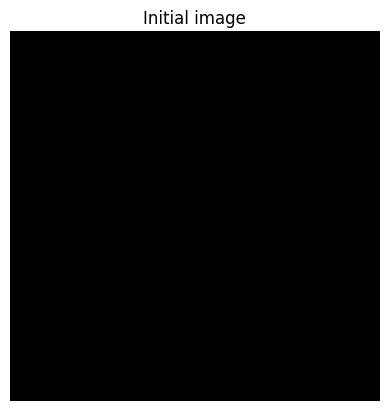

In [18]:
init_img = np.ones((64, 64))

plt.imshow(init_img, cmap='gray')
plt.axis('off')
plt.title('Initial image')
plt.show()

In [19]:
grads_img, times_img, results_img = steepest_descent_img(5, 0.000001, init_img)

Visualizamos la estimación y sus comparaciones.

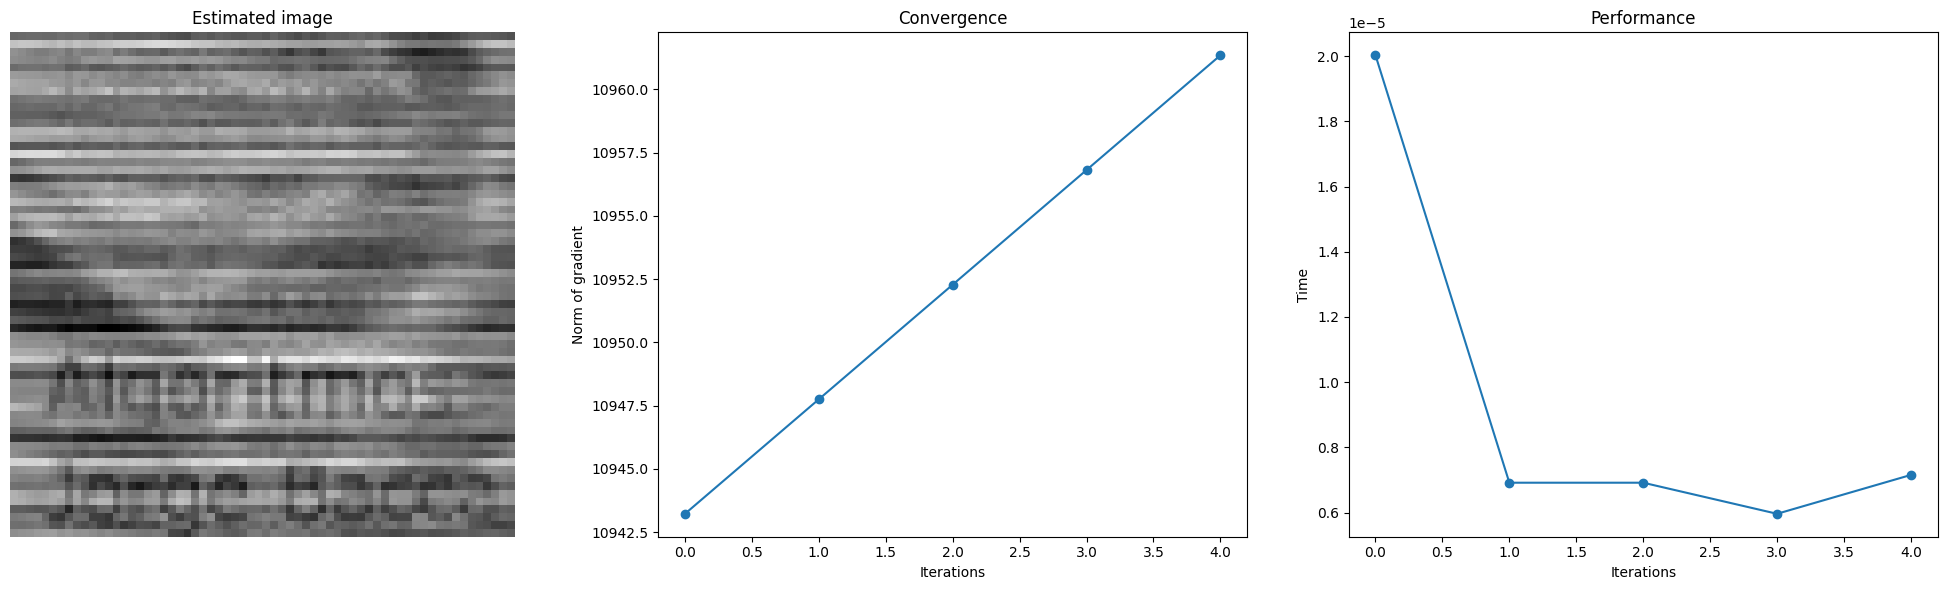

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(results_img[-1], cmap='gray')
plt.axis('off')
plt.title('Estimated image')
plt.subplot(1, 3, 2)
plt.plot(np.linalg.norm(grads_img, axis=(1, 2)), marker = 'o')
plt.xlabel('Iterations')
plt.ylabel('Norm of gradient')
plt.title('Convergence')
plt.subplot(1, 3, 3)
plt.plot(times_img, marker = 'o')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Performance')

plt.tight_layout()
plt.show()